In [25]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
get_ipython().magic('matplotlib notebook')

In [2]:
train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,7.042,10.791,5.313,7.997,5.654,9.27,3.1])

In [3]:
train_X

array([  3.3  ,   4.4  ,   5.5  ,   6.71 ,   6.93 ,   4.168,   9.779,
         6.182,   7.59 ,   2.167,   7.042,  10.791,   5.313,   7.997,
         5.654,   9.27 ,   3.1  ])

In [4]:
train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,2.827,3.465,1.65,2.904,2.42,2.94,1.3])
train_Y

array([ 1.7  ,  2.76 ,  2.09 ,  3.19 ,  1.694,  1.573,  3.366,  2.596,
        2.53 ,  1.221,  2.827,  3.465,  1.65 ,  2.904,  2.42 ,  2.94 ,  1.3  ])

In [5]:
n_samples = train_X.shape[0]
n_samples

17

In [6]:
train_Y.shape[0]

17

In [7]:
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

In [10]:
W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

In [13]:
pred = tf.add(tf.multiply(X, W), b)

In [14]:
pred

<tf.Tensor 'Add:0' shape=<unknown> dtype=float32>

In [49]:
cost = tf.reduce_mean(tf.pow(pred-Y, 2))/(2*n_samples)

In [50]:
cost

<tf.Tensor 'truediv_4:0' shape=<unknown> dtype=float32>

In [62]:
learning_rate = 1.0

In [63]:
optimizer = tf.train.FtrlOptimizer(learning_rate).minimize(cost)

In [64]:
optimizer

<tf.Operation 'Ftrl_4' type=NoOp>

In [65]:
init = tf.global_variables_initializer()

In [66]:
n_epochs = 300
display_step=10
params = np.zeros((3,n_epochs))
feed={X: train_X, Y: train_Y}


In [67]:
with tf.Session() as sess:
    sess.run(init)

<IPython.core.display.Javascript object>


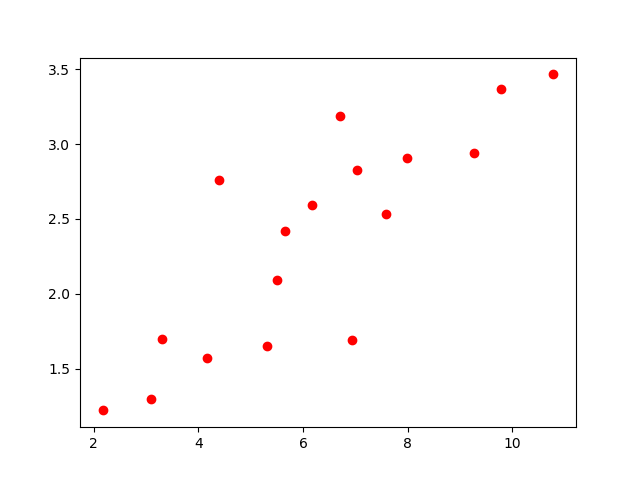

In [68]:
fig= plt.figure()
ax=fig.add_subplot(111)
plt.ion()
plt.plot(train_X, train_Y, 'ro', label='Original data')
fig.show()
fig.canvas.draw()

<IPython.core.display.Javascript object>


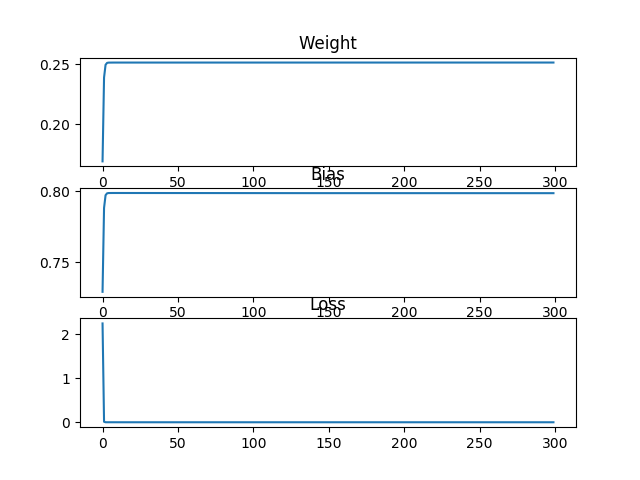

step 9 cost 0.004525225609540939
step 19 cost 0.004525225609540939
step 29 cost 0.004525225609540939
step 39 cost 0.004525226540863514
step 49 cost 0.004525225609540939
step 59 cost 0.004525226075202227
step 69 cost 0.004525225609540939
step 79 cost 0.004525226075202227
step 89 cost 0.004525226075202227
step 99 cost 0.004525226075202227
step 109 cost 0.004525226075202227
step 119 cost 0.004525226075202227
step 129 cost 0.004525225609540939
step 139 cost 0.004525225609540939
step 149 cost 0.004525225143879652
step 159 cost 0.004525225609540939
step 169 cost 0.004525225609540939
step 179 cost 0.004525226075202227
step 189 cost 0.004525226075202227
step 199 cost 0.004525226075202227
step 209 cost 0.004525225609540939
step 219 cost 0.004525226540863514
step 229 cost 0.004525225609540939
step 239 cost 0.004525226075202227
step 249 cost 0.004525224678218365
step 259 cost 0.004525226540863514
step 269 cost 0.004525225609540939
step 279 cost 0.004525225609540939
step 289 cost 0.004525225609540

In [69]:
with tf.Session() as sess:
    sess.run(init)
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.ion()
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    fig.show()
    fig.canvas.draw()
    
    for epoch in range(n_epochs):
        _, loss_val, W_, b_ = sess.run([optimizer, cost, W, b], feed_dict=feed)
        if(epoch+1) % display_step == 0:
            print("step {} cost {}".format(epoch, loss_val))
        params[:,epoch] = np.array([W_, b_, loss_val])
        ax.clear()
        plt.plot(train_X, train_Y, 'ro', label='Original data')
        ax.plot(train_X, W_ * train_X + b_)
        fig.canvas.draw()        
    print ("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print ("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Graphic display
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

# In[127]:


param_titles = ['Weight', 'Bias', 'Loss']

for i in range(params.shape[0]):
    plt.subplot(3, 1, i+1)
    plt.plot(params[i])
    plt.title(param_titles[i])
    plt.show()
